In [1]:
from IPython.display import HTML
HTML('''
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>
''')

# Mach-Zehnder Interferometer as a Filter

In [2]:
HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
''')

## Mach-Zehder Interermoter - Principle of Operation

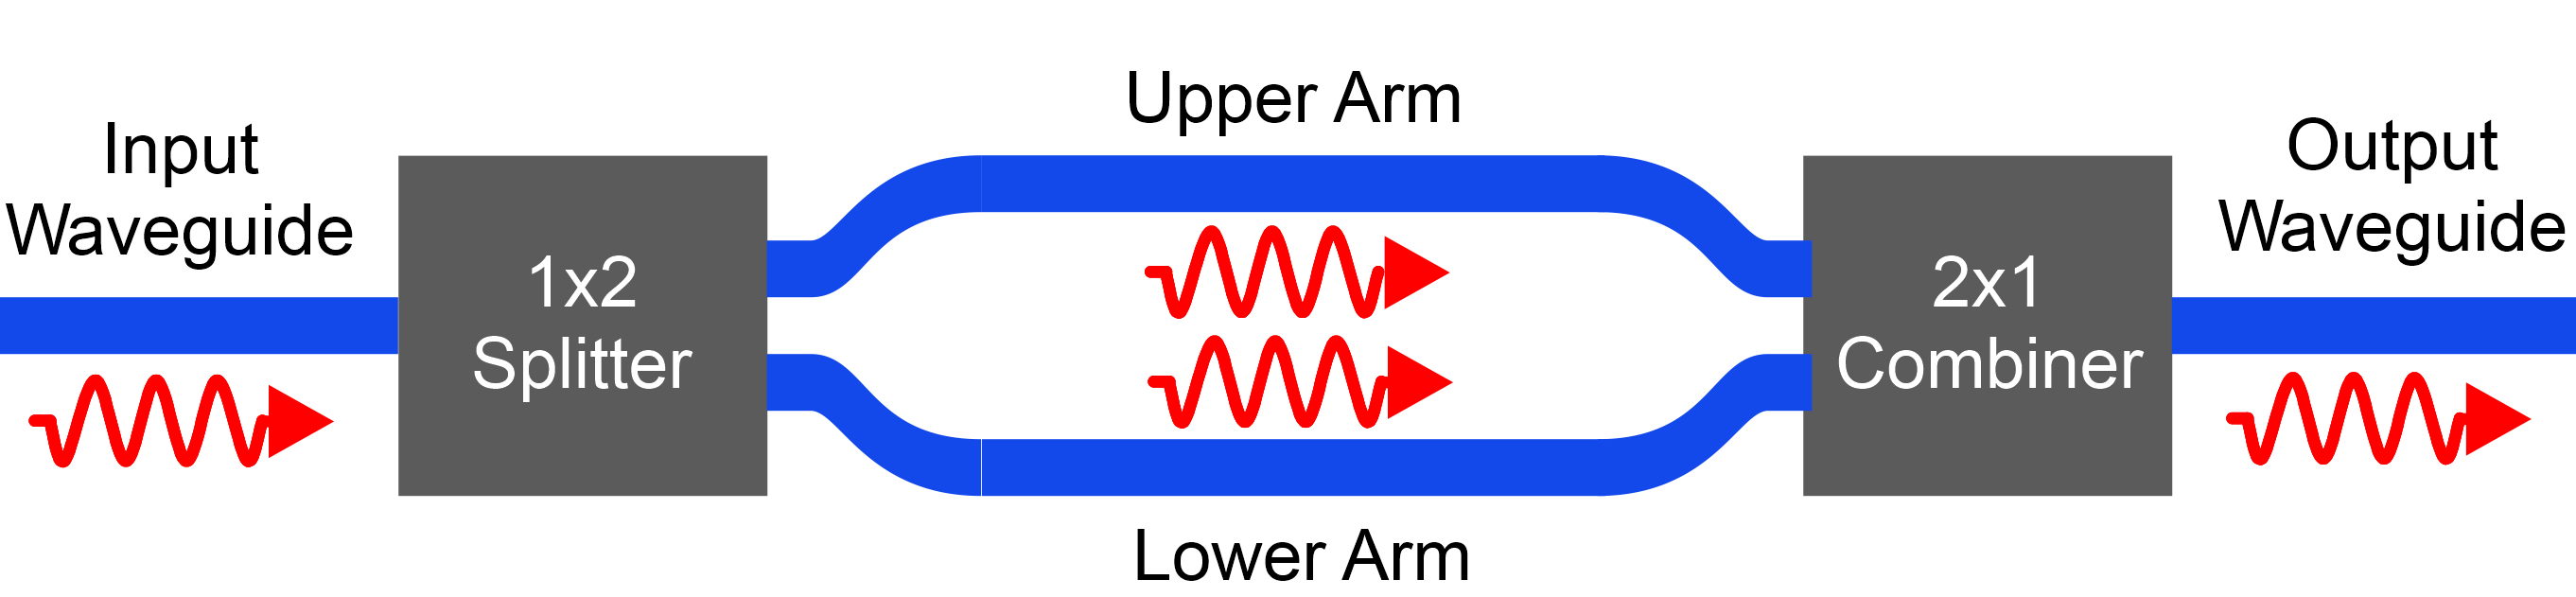

In [3]:
from IPython.core.display import Image
Image(url='https://i.imgur.com/U6idytg.png',embed=True,width=600)

#### Figure 1. A   Mach-Zehnder interferometer implemented with optical waveguides.

<p style="font-size:18px">
A photonic integrated Mach-Zehnder interferometer (Figure 1) consists on an input waveguide, a component that splits the input, two  waveguide "arms", and a component that combines the waves from the two arms to produce a single output. The power for the optical output signal depends on the relative phase at the output waveguide of the contributions from the upper and lower arms. If the arms are identical, we call the device a "balanced" interferometer, and an interferometer with non-identical arms is called "un-balanced".

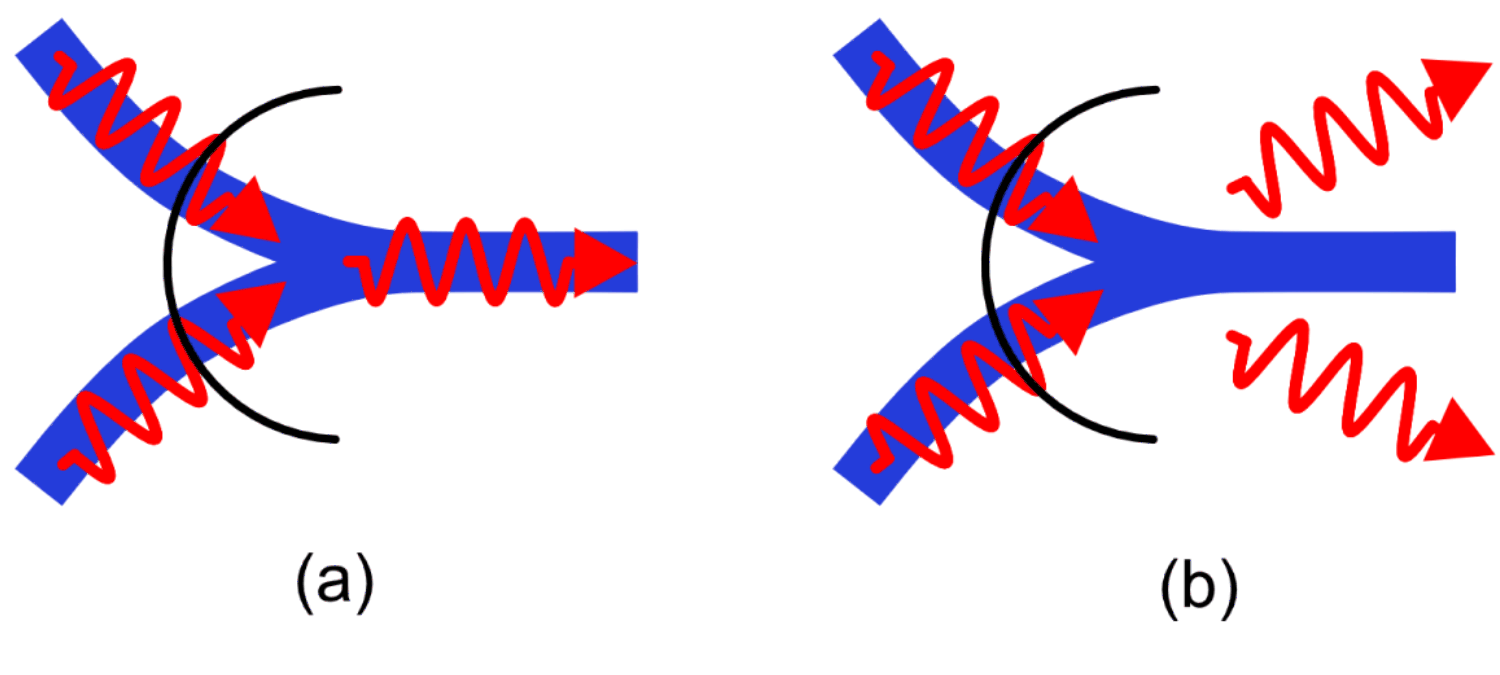

In [4]:
from IPython.core.display import Image
Image(url='https://i.imgur.com/ONF9Z2B.png',embed=True,width=600)

#### Figure 2. A  y-combiner with (a) constructive interference and (b) destructive interference.

<p style="font-size:18px">
The splitter and combiner in Figure 1 can be implemented with y-junctions or with directional couplers. Here we examine the optical inteference at the output waveguide when they are implemented with y-junctions. For this configuration, the optical phase is identical for light entering the upper and lower interferometer arms. The relative phase of the light at the combiner depends on the difference in the optical path length of the two arms  Contributions from the two arms with the same phase interfere constructively and produce a large output (Figure 2a). When contributions are out of phase (Figure 2b), optical power radiates away from of output waveguide, resulting in a small output.

## An Unbalanced Interermeter as an Optical Filter

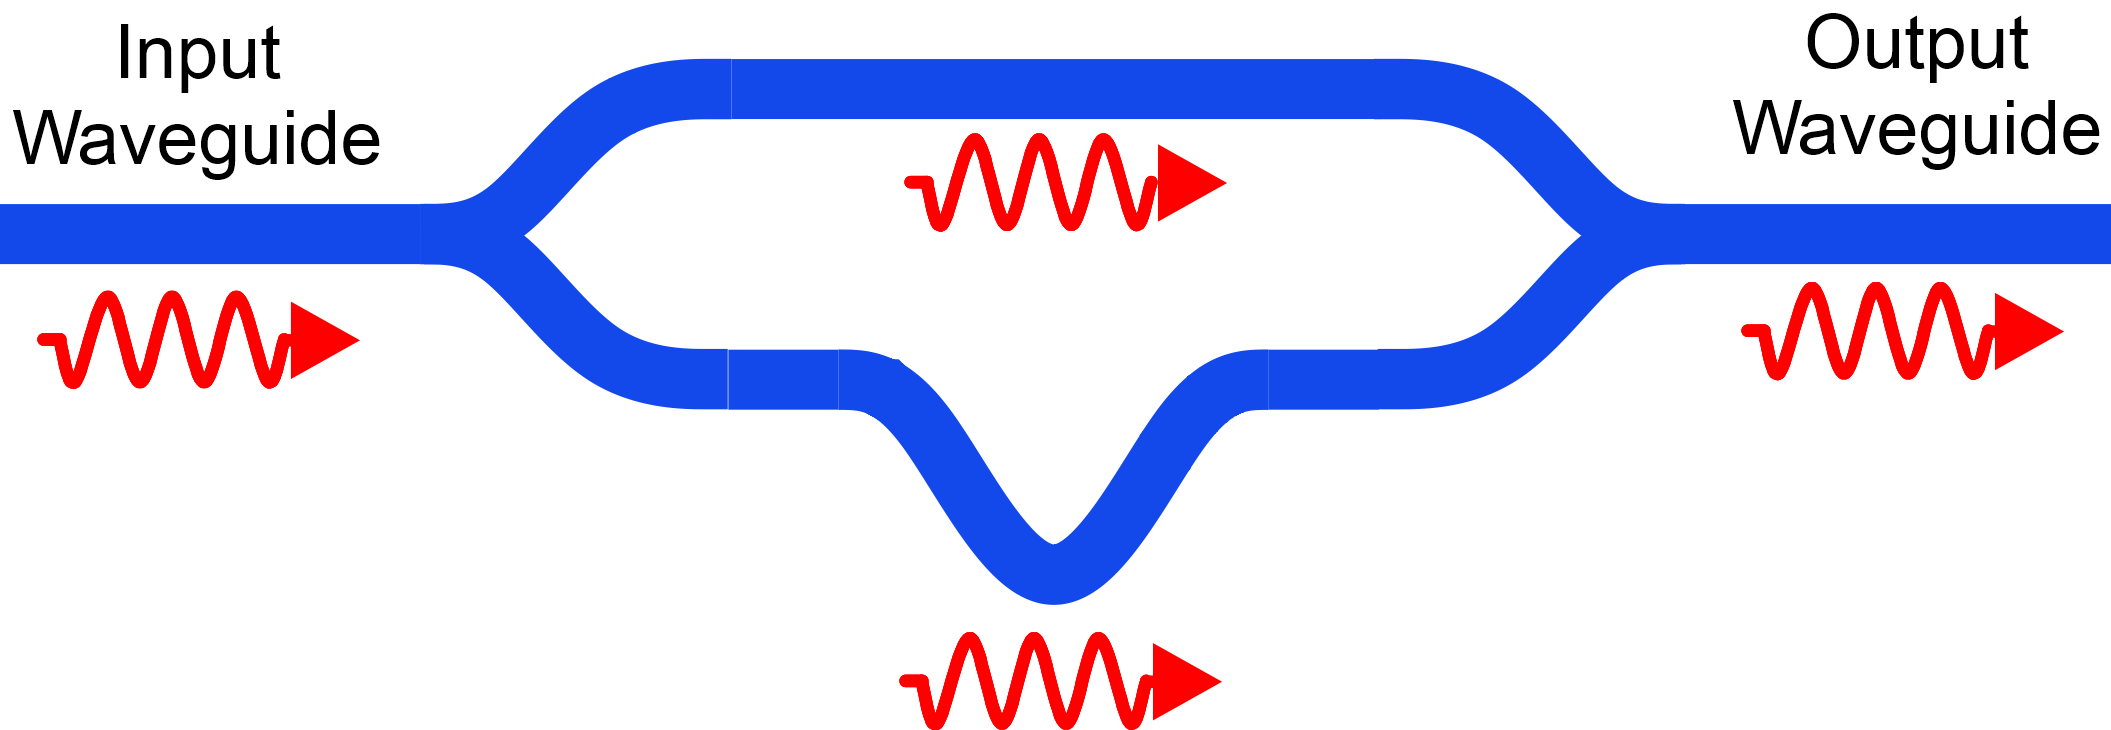

In [5]:
from IPython.core.display import Image
Image(url='https://i.imgur.com/skY90ec.png',embed=True,width=600)

#### Figure 3.  An unbalanced interferometer, which operates as a filter.

<p style="font-size:18px">
Figure 3 shows an inteferometer that is "unbalanced" because the upper and low arms have different lengths. This type of inteferometer can be used as an optical filter. The graph below shows that the transmission has a set of maxima separated in wavelength by an amount that is called the free spectral range. The maxima have values less than one because we have included transmission loss of 15% (0.7 dB) due primarily to losses in the y-junctions, with a smaller contribution from propagation loss in the arms. The passbands for the filter are often taken to be the collection of wavelengths between the half-maximum points of the peaks. Use the widgets for the chart below to explore how the free spectral range and passbands depend on the length of the upper and lower inteferometer arms, and to answer the corresponding homework problems.

In [6]:
import numpy as np
from ipywidgets import IntSlider, interact, ToggleButtons, HBox, VBox, Output
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, Slider, Label
from bokeh.layouts import widgetbox
from bokeh.models.widgets import RadioButtonGroup, Select
from bokeh.layouts import column, row
from bokeh.models import NumeralTickFormatter, BasicTickFormatter, Range1d, Span, Arrow, OpenHead, NormalHead, VeeHead
from bokeh.io import push_notebook
output_notebook()

p = figure(height=400, width=450, background_fill_color="lightgray")
p.x_range = Range1d(1500,1600)
p.outline_line_width = 1; p.outline_line_color = "black"; p.min_border_top = 10
p.xaxis.axis_label = "Wavelength (nm)"
p.yaxis.axis_label = "MZI Transmission"
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "12pt"

wl=np.linspace(1400,1700,301)/1000 # wavelength in micron
neff = 2.43
L_up=100 # Length of upper MZM arm in micron
delta_L=25 # Additional length in lower arm
L_low=L_up+delta_L

delta_n=np.linspace(0,6e-4,100)
T=np.absolute(np.exp(1j*2*np.pi*neff*L_up/wl)+np.exp(1j*2*np.pi*neff*L_low/wl))**2/4*0.85
l1=p.line(wl*1000,T,line_color='darkblue')

xl=(1/(1/1.519+1/(4*2.43*25)))*1000
xr=(1/(1/1.519-1/(4*2.43*25)))*1000
FWHM = Arrow(start=VeeHead(size=10), end=VeeHead(size=10), line_color="red", line_dash='dashed',
                   x_start=xl, y_start=0.425, x_end=xr, y_end=0.425)
p.add_layout(FWHM)
label1=Label(x=1512, y=0.36, text='FWHM', text_color='red', background_fill_color='lightgray')
p.add_layout(label1)
xrFSR=(1/(1/1.519-1/(2.43*25)))*1000
FSR = Arrow(start=VeeHead(size=10), end=VeeHead(size=10), line_color="red", line_dash='dashed',
                   x_start=1519, y_start=0.85, x_end=xrFSR, y_end=0.85)
p.add_layout(FSR)
label2=Label(x=(1519+xrFSR)/2-4, y=0.79, text='FSR', text_color='red', background_fill_color='lightgray')
p.add_layout(label2)

L_up_slider =  IntSlider(min=80,max=110,step=5,value=100,description='Upper Arm Length (micron)',
                         style = {'description_width': '200px'}, layout={'width': '450px'})
L_low_slider = IntSlider(min=115,max=150,step=5,value=125,description='Lower Arm Length (micron)',
                         style = {'description_width': '200px'}, layout={'width': '450px'})

def replot(L_up,L_low):
    T=np.absolute(np.exp(1j*2*np.pi*neff*L_up/wl)+np.exp(1j*2*np.pi*neff*L_low/wl))**2/4*0.85
    l1.data_source.data['y']=T
    xl=(1/(1/1.519+1/(4*2.43*(L_low-L_up))))*1000
    xr=(1/(1/1.519-1/(4*2.43*(L_low-L_up))))*1000
    FWHM.x_start=xl
    FWHM.x_end=xr
    xrFSR=(1/(1/1.519-1/(2.43*(L_low-L_up))))*1000
    FSR.x_end=xrFSR
    label2.x=(1519+xrFSR)/2-4
    push_notebook(handle=fig_handle)

fig_handle = show(p,notebook_handle=True)
interact(replot, L_up=L_up_slider, L_low=L_low_slider);

Loading BokehJS ...

interactive(children=(IntSlider(value=100, description='Upper Arm Length (micron)', layout=Layout(width='450px…

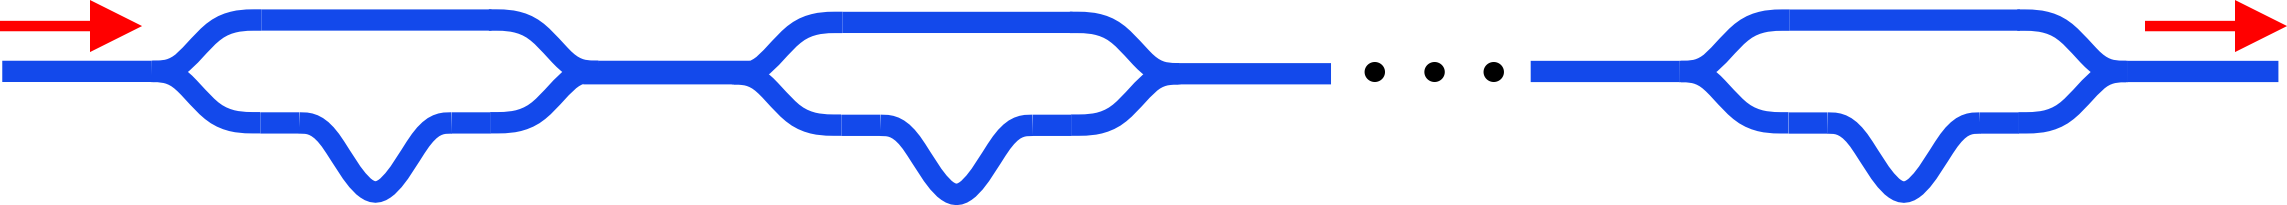

In [7]:
from IPython.core.display import Image
Image(url='https://i.imgur.com/JRvOfbM.png',embed=True,width=800)

#### Figure 4.  A Series of MZI's with a Narrower Passpand

<p style="font-size:18px">
A filter with a narrow passband can be farbicated by assembling a number of un-balanced Mach-Zehnder Interferometers in suies, as illustrated in Figure 4. Each additional MZI narrows the passband, but also increases the insertion loss for the collection. Use the interactive chart below to explore how the number of MZI's affects the filter passband and insertion loss, and to answer the corresponding homework problem.

In [8]:
p = figure(height=400, width=450, background_fill_color="lightgray")
p.x_range = Range1d(1500,1600)
p.y_range = Range1d(0,1)
p.outline_line_width = 1; p.outline_line_color = "black"; p.min_border_top = 10
p.xaxis.axis_label = "Wavelength (nm)"
p.yaxis.axis_label = "MZI Transmission"
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "12pt"

wl=np.linspace(1400,1700,301)/1000 # wavelength in micron
neff = 2.43
L_up=100 # Length of upper MZM arm in micron
delta_L=25 # Additional length in lower arm
L_low=L_up+delta_L

delta_n=np.linspace(0,6e-4,100)
T=np.absolute(np.exp(1j*2*np.pi*neff*L_up/wl)+np.exp(1j*2*np.pi*neff*L_low/wl))**2/4*0.85
l2=p.line(wl*1000,T,line_color='darkblue')

xl=(1/(1/1.519+1/(4*2.43*25)))*1000
xr=(1/(1/1.519-1/(4*2.43*25)))*1000

vline = Span(location=xl, dimension='height', line_color='red', line_width=1, line_dash='dashed')
vline2 = Span(location=xr, dimension='height', line_color='red', line_width=1, line_dash='dashed')
p.add_layout(vline)
p.add_layout(vline2)

FWHM2 = Arrow(start=VeeHead(size=10), end=VeeHead(size=10), line_color="red", line_dash='dashed',
                   x_start=xl, y_start=0.88, x_end=xr, y_end=0.88)
p.add_layout(FWHM2)
label12=Label(x=1512, y=0.92, text='FWHM', text_color='red', background_fill_color='lightgray')
p.add_layout(label12)

L_up_slider2 =  IntSlider(min=80,max=110,step=5,value=100,description='Upper Arm Length (micron)',
                         style = {'description_width': '200px'}, layout={'width': '450px'})
L_low_slider2 = IntSlider(min=115,max=150,step=5,value=125,description='Lower Arm Length (micron)',
                         style = {'description_width': '200px'}, layout={'width': '450px'})
filter_segments_slider =IntSlider(min=1,max=6, step=1, value=1, description="Number of Filter Segments",
                         style = {'description_width': '200px'}, layout={'width': '450px'})
loss_toggle=ToggleButtons(options=['On', 'Off'], description='Loss:',
                         tooltips=['Turn Loss On', 'Turn Loss Off'])

def replot2(L_up,L_low,N,loss_select):
#    loss=(1-loss_button_group.active)*0.08
    if loss_select=='On':
        loss=0.08
    else:
        loss=0.0
    l2.data_source.data['y']=np.absolute(np.exp(1j*2*np.pi*neff*L_up/wl)*(1-loss)
                        +np.exp(1j*2*np.pi*neff*L_low/wl)*(1-loss))**(2*N)/4**N
    xl=((1/(1/1.519+1/(4*2.43*(L_low-L_up))))*1000-1519)*(4/np.pi)*np.arccos(0.5**(0.5/N))+1519
    xr=((1/(1/1.519-1/(4*2.43*(L_low-L_up))))*1000-1519)*(4/np.pi)*np.arccos(0.5**(0.5/N))+1519
    FWHM2.x_start=xl
    FWHM2.x_end=xr
    vline.location=xl
    vline2.location=xr
    push_notebook(handle=fig_handle2)

fig_handle2 = show(p,notebook_handle=True)
interact(replot2, L_up=L_up_slider2, L_low=L_low_slider2, N=filter_segments_slider, loss_select=loss_toggle);

interactive(children=(IntSlider(value=100, description='Upper Arm Length (micron)', layout=Layout(width='450px…